In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
train_data = pd.read_excel(r"F:\SELF STUDY\PROJECT\dataset\Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,GoAir,2021-05-11,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5h 55m,1 stop,No info,7652
1,Vistara,2021-01-12,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668
2,Vistara,2021-01-15,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
3,Vistara,2021-06-26,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3187
4,Air India,2021-05-02,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,23:15,13h 25m,2 stops,No info,13727


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10421 entries, 0 to 10420
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10421 non-null  object        
 1   Date_of_Journey  10421 non-null  datetime64[ns]
 2   Source           10421 non-null  object        
 3   Destination      10421 non-null  object        
 4   Route            10420 non-null  object        
 5   Dep_Time         10421 non-null  object        
 6   Arrival_Time     10421 non-null  object        
 7   Duration         10421 non-null  object        
 8   Total_Stops      10420 non-null  object        
 9   Additional_Info  10421 non-null  object        
 10  Price            10421 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 895.7+ KB


In [5]:
train_data["Duration"].value_counts()

2h 50m     541
1h 30m     384
2h 45m     326
2h 55m     322
2h 35m     320
          ... 
33h 45m      1
30h 10m      1
31h 30m      1
42h 5m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data.dropna(inplace = True) #dropping nan values

<AxesSubplot:>

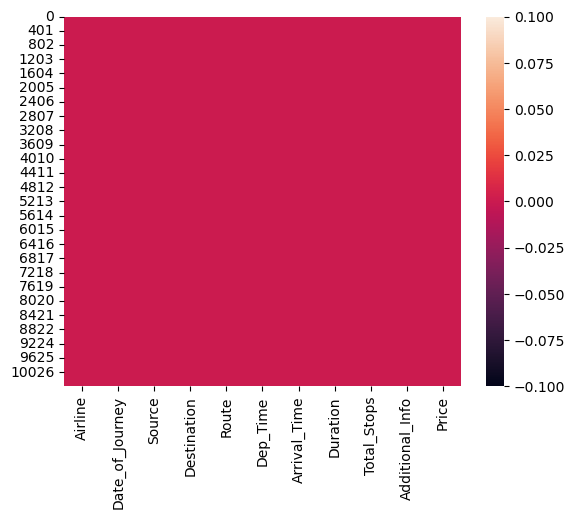

In [7]:
sns.heatmap(train_data.isnull())

# no null values 

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

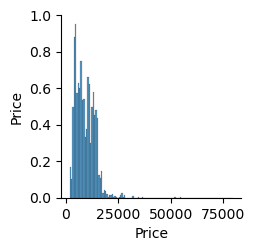

In [9]:
sns.pairplot(train_data)

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,GoAir,2021-05-11,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5h 55m,1 stop,No info,7652
1,Vistara,2021-01-12,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668
2,Vistara,2021-01-15,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
3,Vistara,2021-06-26,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3187
4,Air India,2021-05-02,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,23:15,13h 25m,2 stops,No info,13727


---

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

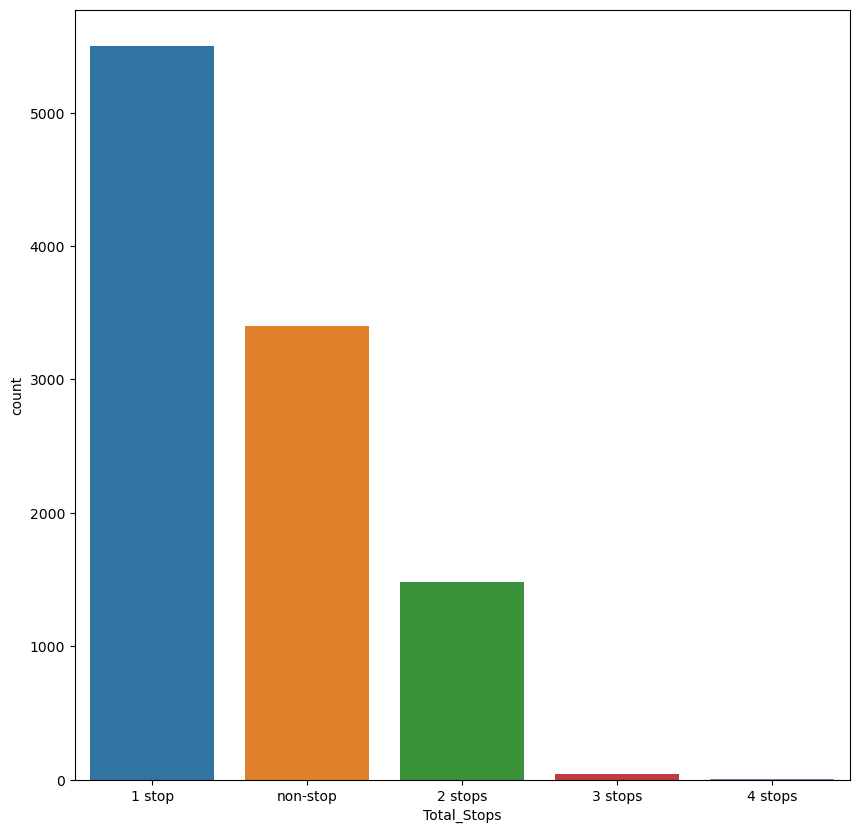

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='Total_Stops',data=train_data)

## we can see that Total stops = 1 are more

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

<AxesSubplot:xlabel='Airline', ylabel='count'>

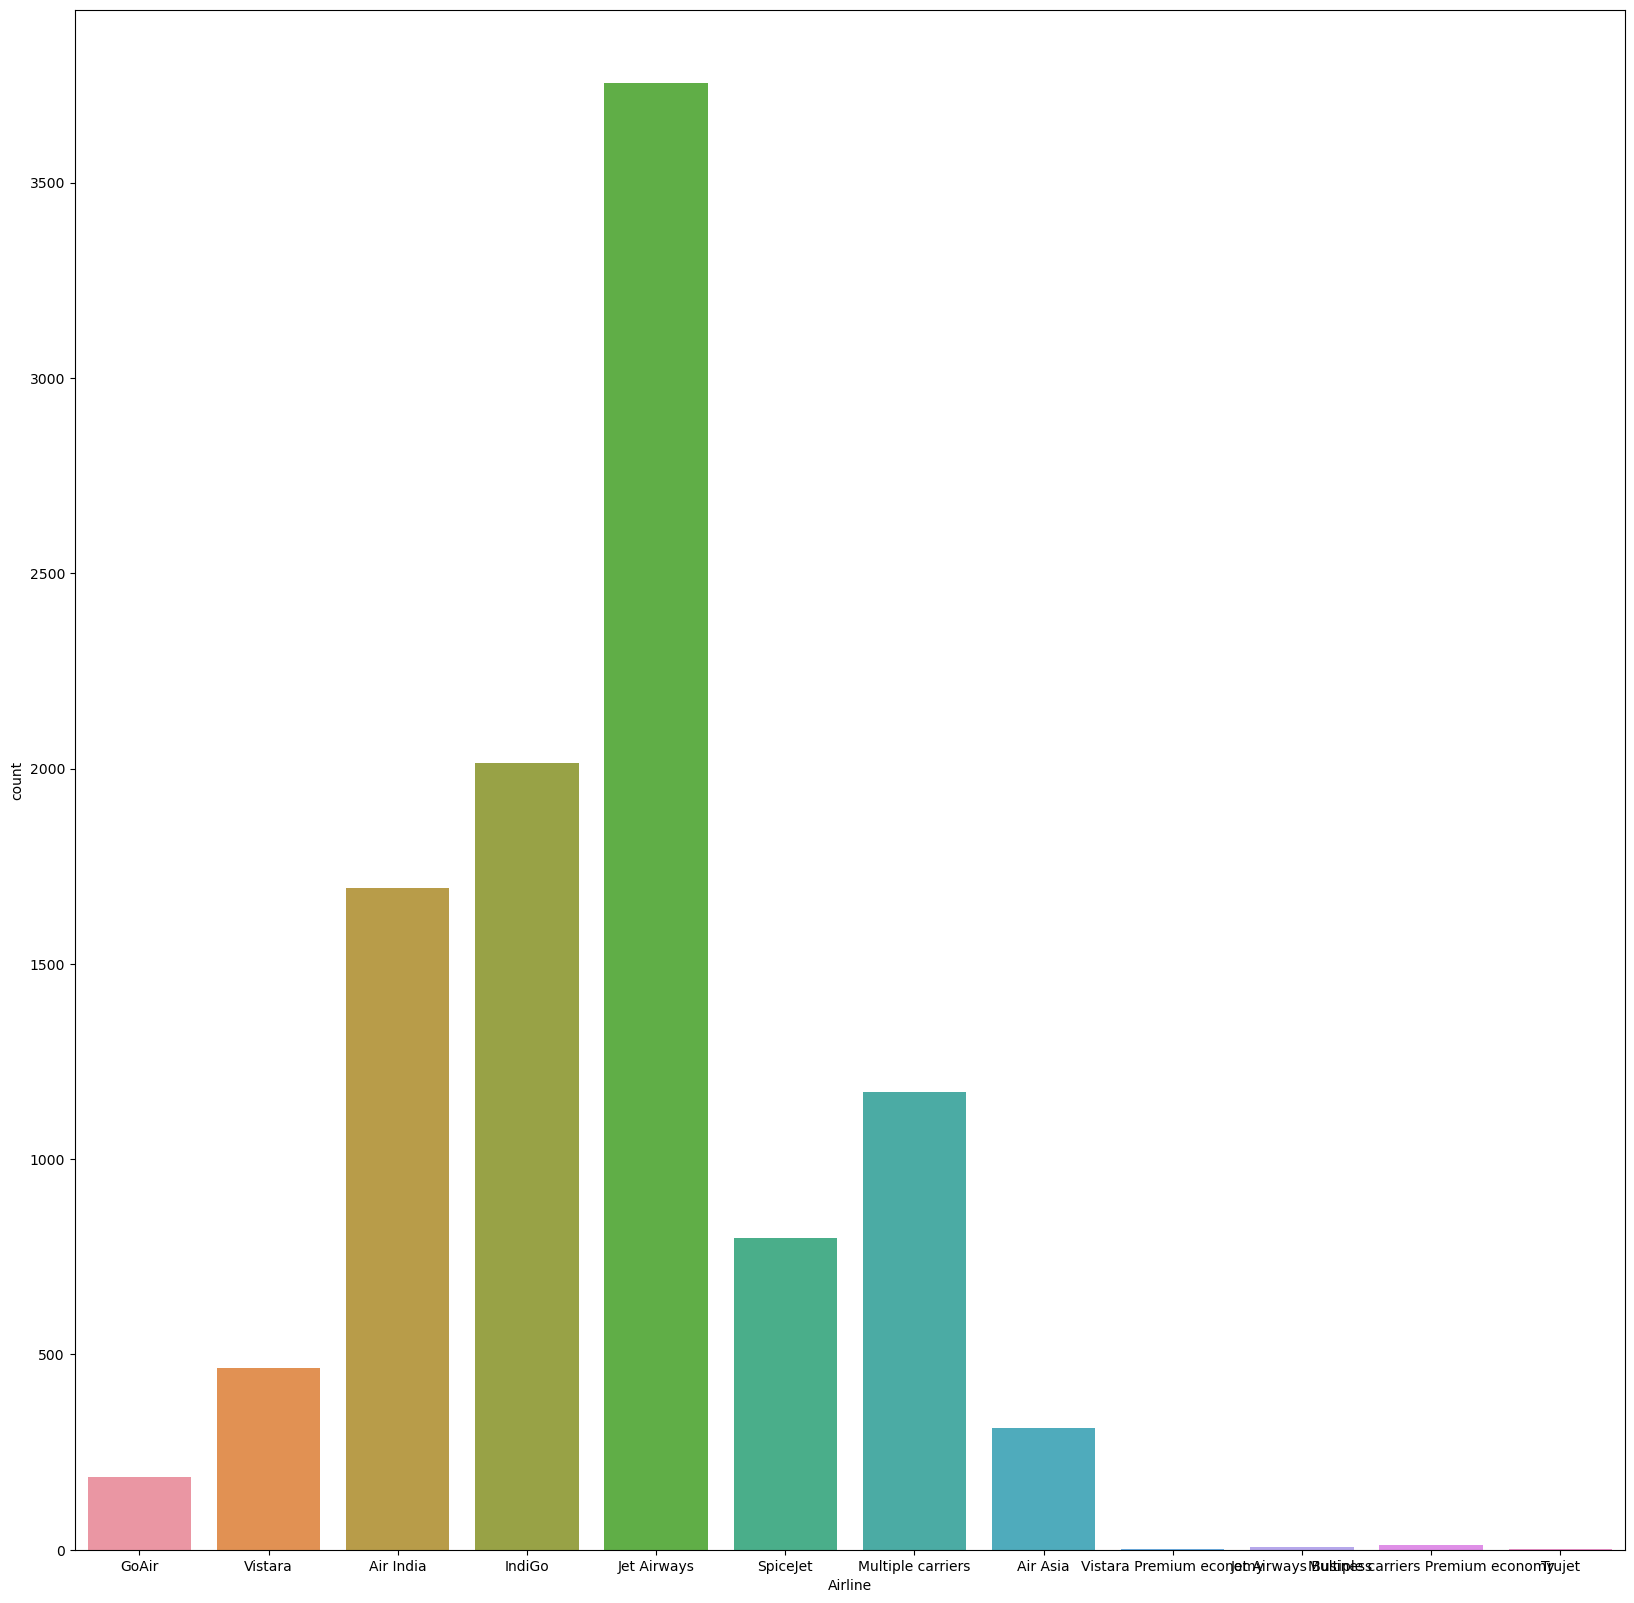

In [14]:
plt.figure(figsize=(20,20))
sns.countplot(x='Airline',data=train_data)

## Jet airways has more passengers 

In [15]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

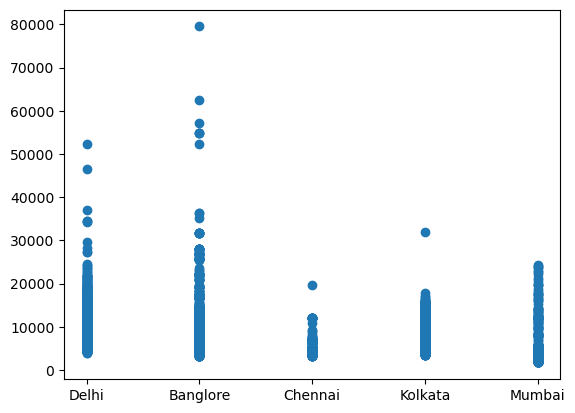

In [16]:
plt.scatter(train_data['Source'],train_data['Price'])
plt.show()

In [17]:
#pd.to_datetime will convert the dep_time into datetime col 
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,GoAir,Delhi,Cochin,DEL → BOM → COK,12:55,5h 55m,1 stop,No info,7652,11,5,7,0
1,Vistara,Banglore,Delhi,BLR → DEL,12:35,2h 50m,non-stop,No info,4668,12,1,9,45
2,Vistara,Chennai,Kolkata,MAA → CCU,09:20,2h 15m,non-stop,No info,3687,15,1,7,5
3,Vistara,Chennai,Kolkata,MAA → CCU,09:20,2h 15m,non-stop,No info,3187,26,6,7,5
4,Air India,Kolkata,Banglore,CCU → GAU → DEL → BLR,23:15,13h 25m,2 stops,No info,13727,2,5,9,50


In [19]:

train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Price',data=train_data)

In [ ]:
train_data["Price"].hist()

In [ ]:
train_data.head()

In [ ]:
# It is the difference betwwen Departure Time and Arrival time
# converting Duration col in the  list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [ ]:
train_data["Duration_hours"].hist()

In [ ]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
train_data.head()

---

In [ ]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

In [ ]:
train_data["Airline"].value_counts()

In [ ]:
# Source vs Price
sns.barplot(y="Price",x="Source",data=train_data.sort_values("Price"))

In [ ]:
train_data["Source"].value_counts()

In [ ]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

In [ ]:
train_data["Destination"].value_counts()

In [ ]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

In [ ]:
train_data["Route"]

In [ ]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
train_data["Total_Stops"].value_counts()

In [ ]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
train_data.head()

In [ ]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [ ]:
data_train.head()

In [ ]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_train.head()

In [ ]:
data_train.shape

---

## Test set

In [ ]:
test_data = pd.read_excel(r"F:\SELF STUDY\PROJECT\dataset\Test_set.xlsx")

In [ ]:
test_data.head()

In [ ]:
print(test_data.info())

In [ ]:
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

In [ ]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  


test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
print("*******Airline")
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print("*******Source")
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print("*******Destination")
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

In [ ]:
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print("Shape of test data : ", data_test.shape)

In [ ]:
data_test.head()

---

 Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,




In [ ]:
data_train.columns

In [ ]:
data_train.shape

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

In [ ]:
y = data_train.iloc[:, 1]
y.head()

In [ ]:
# Important feature using ExtraTreesRegressor
# ExtraTreesRegressor helps you to find feature importance 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

In [ ]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [ ]:
print(selection.feature_importances_)

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()


---

Random Forest Regressor



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_var = RandomForestRegressor()
rf_var.fit(X_train, y_train)

In [ ]:
y_pred = rf_var.predict(X_test)

In [ ]:
rf_var.score(X_train, y_train)

In [ ]:
rf_var.score(X_test, y_test)

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()
#gaussian distribution 

In [ ]:
from sklearn import metrics

In [ ]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
metrics.r2_score(y_test, y_pred)

In [ ]:
# linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_t,X_te,Y_t,Y_te=train_test_split(X,y,test_size=0.4,random_state=69)

In [ ]:
model=LinearRegression()
model.fit(X_t,Y_t)

In [ ]:
y_p=model.predict(X_te)

In [ ]:
y_p

In [ ]:
y_p.shape

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

training_data_accuracy = mean_squared_error(y_p, Y_te)
training_data_accuracy

In [ ]:
model.score(X_te,Y_te)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
features=X
classes=y

In [ ]:
classes2=classes.astype(str)
classes2

In [ ]:
(train_feat,test_feat,train_classes,test_classes)=train_test_split(features,classes,test_size=0.3,random_state=100)

In [ ]:
print("train_feat\n",train_feat,"\n",train_feat.shape)
print("train_classes\n",train_classes,"\n",train_classes.shape)
print("\n \n")
print("test_feat\n",test_feat,"\n",test_feat.shape,"\n")
print("test_classes\n",test_classes,"\n",test_classes.shape)

In [ ]:
#training for decsion tree classisifier
dectree=DecisionTreeClassifier(criterion='gini')
dectree.fit(train_feat,train_classes)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
pred=dectree.predict(test_feat)
print("Accuracy",accuracy_score(test_classes,pred))
print("Classification Report\n",classification_report(test_classes,pred))
print("Confusion Matrix\n",confusion_matrix(test_classes,pred))


In [ ]:
test_rep=tree.export_text(dectree)
print(test_rep)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)


In [ ]:
# define the model
model = XGBRegressor()


In [ ]:
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')


In [ ]:
# report performance
print('Mean Absolute Error: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


#### as Linear regreesion is not giving a good accuracy we will go with random forest regressor 

---

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

r_g = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_randomize = RandomizedSearchCV(estimator = rf_var, param_distributions = r_g,scoring='neg_mean_squared_error', n_iter = 8, cv = 5, verbose=2, random_state=69, n_jobs = 1)

In [ ]:
rf_randomize.fit(X_train,y_train)

In [ ]:
rf_randomize.best_params_

In [ ]:
prediction = rf_randomize.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

---

In [ ]:
import pickle
file = open('flight.pkl', 'wb')
pickle.dump(rf_randomize, file)

In [ ]:
model = open('flight.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_predict = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_predict)

### Model is 82 % Accurate 